In [93]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Dataframes').getOrCreate()


In [94]:
pip install pickle


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [95]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import category_encoders as ce
import numpy as np


In [97]:
spark

In [98]:
df = spark.read.csv('../userInput/files/breast-cancer.csv',inferSchema = True,header=True) ### read dataset with header
### inferschema is necessary as it gives the correct output for the schema data type
### this is the dataframe from spark

In [99]:
df.show(5)

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+---

In [100]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

In [101]:
df.select('id').head(3)

[Row(id=842302), Row(id=842517), Row(id=84300903)]

In [102]:
df = df.toPandas()

In [ ]:
### specified output variable from the users 

In [ ]:
def describe_func(df): ###describe function to display the result
    desc = df.describe()
    null_values = df.isnull().sum()
    null_values = null_values.to_frame()
    null_value_count = pd.DataFrame(null_values,columns=null_values.index,index=["Null_count"])
    desc = pd.concat([desc,null_value_count])
    return desc

In [13]:
import pickle

In [14]:
with open('describe_model',"wb") as files:
    pickle.dump(describe_func,file=files)

In [15]:
output = "diagnosis"

In [16]:
describe_func(df)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,NaN
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN
Null_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
obj_columns = [col for col in df.columns if df[col].dtype == "object"]
print(obj_columns)

['diagnosis']


In [18]:
null_value_col = [col for col in df.columns if df[col].isnull().sum() > 0]
print(null_value_col)

[]


In [19]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [21]:
X = df.drop([output],axis=1)
y = df[output]
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
# X_train,_,y_train,_ = train_test_split(X,y,test_size=0,random_state=42)

In [23]:
##### 1st encoder

onehot_encoding_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), obj_columns)
    ],
    remainder='passthrough'
)

In [24]:
##### 1st encoder

from sklearn.base import BaseEstimator, TransformerMixin
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        for column in output.columns:
            label_encoder = LabelEncoder()
            output[column] = label_encoder.fit_transform(output[column])
        return output

label_encoding_transformer = ColumnTransformer(
    transformers=[
        ('label', MultiColumnLabelEncoder(), obj_columns)
    ],
    remainder='passthrough'
)

In [25]:
##### 1st encoder

binary_encoder = ce.BinaryEncoder(cols = obj_columns,return_df=True)


In [26]:
transformed_data = label_encoding_transformer.fit_transform(df)

In [27]:
print(type(transformed_data))
transformed_data.shape

<class 'numpy.ndarray'>


(569, 32)

In [28]:
transformed_data = pd.DataFrame(transformed_data)

In [29]:
transformed_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,926424.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,926682.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,926954.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,927241.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
### 1st imputer

imputer_most_frequent_transformer = ColumnTransformer(
    transformers=[
        ('most_frequent_imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan), null_value_col)
    ],
    remainder='passthrough'
)


In [31]:
### 2nd imputer

imputer_mean_transformer = ColumnTransformer(
    transformers=[('mean_imputer',SimpleImputer(strategy='mean',missing_values=np.nan),null_value_col)],
    remainder='passthrough'
)

In [32]:
### 3rd imputer

imputer_median_transformer = ColumnTransformer(
    transformers=[('median_imputer',SimpleImputer(strategy='median',missing_values=np.nan),null_value_col)],
    remainder='passthrough'
)

In [41]:
standard_scale_transformer = ColumnTransformer(
    [('standard_scaler',StandardScaler(),slice(0,tdf.shape[1]))],
    
)

In [42]:
min_max_scale_transformer = ColumnTransformer(
    [(
        'min_max_scaler',MinMaxScaler(),slice(0,tdf.shape[1])
    )]
)

In [44]:
scaled_tdf = pd.DataFrame(min_max_scale_transformer.fit_transform(tdf))

In [45]:
scaled_tdf

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.000915,0.0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.0,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.0,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.0,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.0,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.0,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,0.0,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,0.0,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,0.0,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [46]:
from sklearn.pipeline import make_pipeline

In [47]:
onehot_mf_pipeline = make_pipeline(onehot_encoding_transformer,imputer_most_frequent_transformer)
onehot_mean_pipeline = make_pipeline(onehot_encoding_transformer,imputer_mean_transformer)
onehot_median_pipeline = make_pipeline(onehot_encoding_transformer,imputer_median_transformer)

In [48]:
label_mf_pipeline = make_pipeline(label_encoding_transformer,imputer_most_frequent_transformer)
label_mean_pipeline = make_pipeline(label_encoding_transformer,imputer_mean_transformer)
label_median_pipeline = make_pipeline(label_encoding_transformer,imputer_median_transformer)


In [49]:
binary_mf_pipeline = make_pipeline(binary_encoder, imputer_most_frequent_transformer)
binary_mean_pipeline = make_pipeline(binary_encoder, imputer_mean_transformer)
binary_median_pipeline = make_pipeline(binary_encoder, imputer_median_transformer)

In [50]:
tdf=binary_mf_pipeline.fit_transform(df)

c:\Users\ayush\OneDrive\Desktop\Projects\subspace\.conda\lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
c:\Users\ayush\OneDrive\Desktop\Projects\subspace\.conda\lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\ayush\OneDrive\Desktop\Projects\subspace\.conda\lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
c:\Users\ayush\OneDrive\Desktop\Projects\subspace\.conda\lib\site-packages\category_encoders\utils.py:50: FutureWarni

In [43]:
tdf.shape[0]

569

In [51]:
tdf

array([[8.4230200e+05, 0.0000000e+00, 1.0000000e+00, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 0.0000000e+00, 1.0000000e+00, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 0.0000000e+00, 1.0000000e+00, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 0.0000000e+00, 1.0000000e+00, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 0.0000000e+00, 1.0000000e+00, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [52]:
tdf = pd.DataFrame(tdf)

In [53]:
tdf

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,842302.0,0.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517.0,0.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903.0,0.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301.0,0.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,0.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,0.0,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682.0,0.0,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954.0,0.0,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,0.0,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [66]:
import seaborn as sns

def plot_outlier_graphs(scaled_tdf):
    scaled_tdf.boxplot()
    plt.title('Box plot for each column')
    plt.xlabel('column index')
    plt.ylabel('values')
    


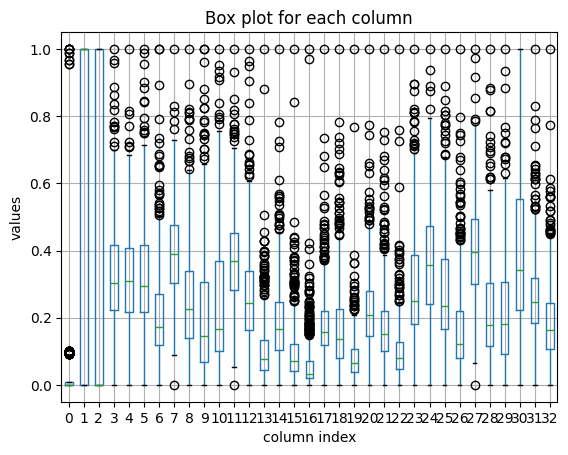

In [67]:
plot_outlier_graphs(scaled_tdf)

In [74]:
from sklearn.feature_selection import SelectKBest,chi2


def feature_selection_func(k_value):
    return SelectKBest(k=k_value,score_func=chi2)


In [76]:
final_df = feature_selection_func(10).fit_transform(X,y)

In [84]:
with open('..\\model\\feature_select.pkl',"wb") as files:
    pickle.dump(feature_selection_func,file=files)

In [87]:
with open('..\\model\\plot_outliers.pkl','wb') as files:
    pickle.dump(plot_outlier_graphs,file=files)

In [89]:
with open("..\\model\\onehot_mf_pipeline.pkl", "wb") as files :
    pickle.dump(onehot_mf_pipeline,file=files)
with open("..\\model\\onehot_mean_pipeline.pkl", "wb") as files :
    pickle.dump(onehot_mean_pipeline,file=files)
with open("..\\model\\onehot_median_pipeline.pkl", "wb") as files :
    pickle.dump(onehot_median_pipeline,file=files)

In [90]:
with open("..\\model\\label_mf_pipeline.pkl", "wb") as files :
    pickle.dump(label_mf_pipeline,file=files)
with open("..\\model\\label_mean_pipeline.pkl", "wb") as files :
    pickle.dump(label_mean_pipeline,file=files)
with open("..\\model\\label_median_pipeline.pkl", "wb") as files :
    pickle.dump(label_median_pipeline,file=files)

In [91]:
with open("..\\model\\binary_mf_pipeline.pkl", "wb") as files :
    pickle.dump(binary_mf_pipeline,file=files)
with open("..\\model\\binary_mean_pipeline.pkl", "wb") as files :
    pickle.dump(binary_mean_pipeline,file=files)
with open("..\\model\\binary_median_pipeline.pkl", "wb") as files :
    pickle.dump(binary_median_pipeline,file=files)

In [92]:
with open("..\\model\\standard_scale_function.pkl","wb") as files:
    pickle.dump(standard_scale_transformer,file=files)

with open("..\\model\\min_max_scale_function.pkl","wb") as files:
    pickle.dump(min_max_scale_transformer,file=files)